# Proyección vectorial

## Interpretacion 

Se llema proyeccion vectorial entre dos vectores a la fomra de encontrar un escalar que permita tener que dos vectores tengan la misma magnitud.  Pensado en dos vectores llamo "w" y  "v"

En este caso encontrando la proyeccion de "W" sobre "V", es como ver el tamñao de la sombra que se haria debajo de "W" sobre el plano donde se encuentre "V"

Como se muestra en la imagen :



![image](https://matthew-brett.github.io/teaching/_images/vector_projection.svg)


El calculo del la proyeccin se puede calcular como 
projv⃗ w⃗ =w⃗ ⋅v⃗ / ∥v⃗∥ 


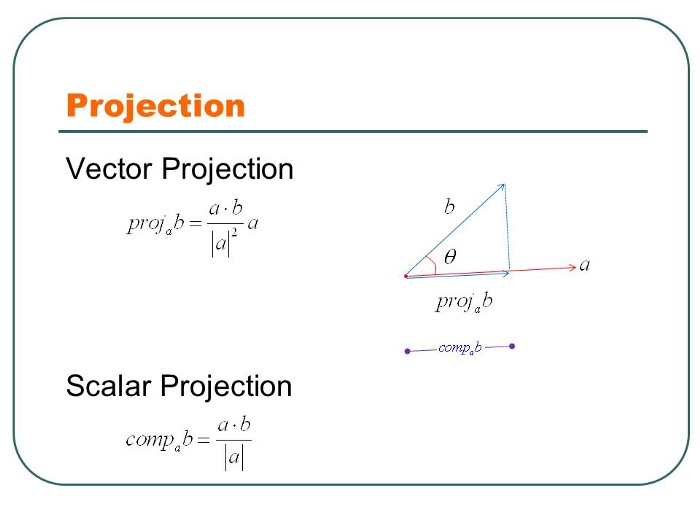



Fuente https://matthew-brett.github.io/teaching/vector_projection.html
https://medium.com/@swastiknayak76/linear-algebra-for-data-science-and-machine-learning-caa886e38a84

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def proyeccionvectorial(w,v):
    ##Proyeccion de w sobre v
    pv = v * np.dot(w, v) / np.dot(v, v)
    return pv

In [15]:
v1 = np.array([4,6,3])
v2 = np.array([7,9,3])
v3=proyeccionvectorial(v1,v2)
print(v3)

[4.58273381 5.89208633 1.96402878]


# Producto Punto

Es la multiplicacion de dos vectores , en donde se entiende como la suma de la multiplicación de cada componente entre vectores, con respecto a su dirección. En una forma geometrica se puede definir como el producto del modulo de los vectores por el coseno del angulo entre los dos vectores. 

### Esto es utilizado en Redes neuronales

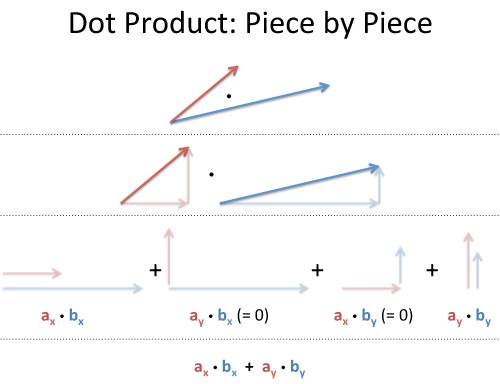

Fuente
https://towardsdatascience.com/naive-classification-using-scalar-projection-with-interactive-code-298279afb11f


https://es.wikipedia.org/wiki/Producto_escalar

In [18]:

x1 = np.array([4,3,1]) 
y2 = np.array([2,1,1]) 
pp = np.cross(x1,y2)
print (pp)

[ 2 -2 -2]


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Ejercicios clase 06


## Ejercicio
ejercicio : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:

In [20]:
# tu codigo aqui (~ 5 lineas de codigo): 
x1=np.arange(0, 0.6, 0.1)
x2=np.arange(0.51, 0.6, 0.01)
x3=np.arange(0.7,1,0.1)
xs=np.hstack((x1,x2,x3))
print(xs)

[0.   0.1  0.2  0.3  0.4  0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58
 0.59 0.7  0.8  0.9  1.  ]



## Ejercicio
Ejercicio (parte de tarea) En este caso usamos un ciclo para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for. tip: usar slicing

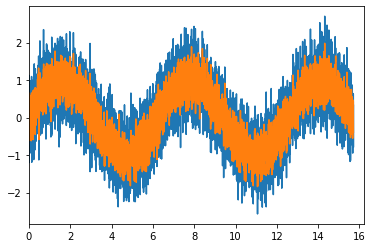

In [21]:
sample_points = 10000
inicio_intervalo = 0
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(inicio_intervalo,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#ys es "y suavizado", inicialmente es una copia de y
ys =  y.copy()

def mediaFrec(yt, n = 3):
    cumsum = np.cumsum(yt, dtype=float)
    cumsum[n:] = cumsum[n:] - cumsum[:-n]
    return (cumsum[n - 1:] / n)


ys = mediaFrec(y)


#ys = y

#ys[2] = 5

plt.plot(x,y)
plt.plot(x[1:-1],ys)
plt.xlim(inicio_intervalo,5*np.pi + 0.5)
plt.show()

## Ejercicio
Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5    ,    0.31127812]

**Nota**: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

In [30]:
# tu codigo aqui (~ 4 lineas de codigo)

def calculoentropiater(px):
    return (-1*(px * np.log2(px)))

calculoentropiater([0.2, 0.83])

array([0.46438562, 0.22311791])

## Ejercicio
Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

tip investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [28]:
def mode(x):
    ## tu codigo aqui (~ 3 lineas de codigo):
    
    valor, conteo = np.unique(x, return_counts=True)
    indice = np.argmax(conteo)
    
    return valor[indice]
    
print(mode(x))

0.0


## Ejercicio
    crear una función para calcular la entropía  de una distribución de probabilidad representada como un vector.
$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

**Nota**: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso  si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.

**recordatorio**: no usar ciclos solo operaciones vectorizadas.

In [33]:
def calculoentropia(px):
    return np.sum(-1*(px * np.log2(px)))

calculoentropia([0.35, 0.83])

0.7532185199854893

## Ejercicio
En ML usamos la entropía cruzada como una forma de medir que tan bueno es un modelo de variables discretas a través de comparar la distribución de probabilidad que el modelo produce o predice, vs la distribución de probabilidad real dada por los datos de entrenamiento.

Podemos ver el siguiente ejemplo que define la forma en que se calcula la entropía cruzada y nos muestra un caso específico:

<img src="https://image.slidesharecdn.com/publishintroductiontodeeplearninginpythonandmatlab1-160502102437/95/introduction-to-deep-learning-in-python-and-matlab-54-638.jpg?cb=1462185644">

En este caso interpretamos así: El problema consiste en un modelo o algoritmo de ML que debe producir un vector de 3 elementos indicando la probabilidad de que ciertos datos X pertenezcan a una de 3 categorías.

* El modelo de ML produce un vector que indica que estima un 70% de probabilidad de que se trate de la categoría 0, 20% de probabilidad de que se trate de la categoría 1 y 10% de que se trate de la categoría 2.
* Los datos reales nos dicen que se trataba de un caso donde con total certeza se sabe que se trata de la categoría 0
* La entropía cruzada(a calcular en el ejercicio) nos indica que tan buena es la estimación del modelo, una EC de 0 es un modelo perfecto(en este caso un modelo que predice 100% de prob para la clase 0)

**Nota** 
* Aun que para calcular la entropía usamos logaritmos en base 2, en ML para calcular la entropía cruzada se usa logaritmo natural ya que con este se cumple el proposito **estimar que tanto se alejan las predicciones del modelo de ML de los datos reales** y es comunmente mas rápido de calcular en la computadora.
* Ya que estamos trabajando con vectores que representan distribuciones de probabilidad , podemos toparnos con lo que se conoce como : **sparse vectors**(vectores donde la mayoría de elementos son 0), esto puede producir problemas ya que le logaritmo de 0 no esta definido, tu solución debe tomar en cuenta esto y evitar que devuelva "nan"

In [7]:
def cross_entropy(Y,Y_hat):
    ##tu codigo aqui (~ 1 lineas de codigo)
    return np.sum(-1*(Y * np.log(Y_hat)))

y  = np.array([1.0,0,0])
y_hat = np.array([0.7,0.2,0.1]) # <- resultado de algun modelo predictivo

cross_entropy(y,y_hat)

0.35667494393873245

## Ejercicio :
crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2) ,luego usarla para evaluar 2 vectores que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.

In [35]:
def magnitud(x):
    ## tu codigo aqui (~ 1 linea de codigo)
    return np.sqrt(np.sum(np.power(x,2))) # raiz cuadrada

errores_modelo1 = np.array([1,2,1,2]) #
errores_modelo2 = np.array([0,1,1,2]) #

magmodelo1 = magnitud(errores_modelo1)
magmodelo2 = magnitud(errores_modelo2)

print(magmodelo1)
print(magmodelo2)

# elegir el mejor modelo con una condicional(if)
if magmodelo1 < magmodelo2:
  print ("El mejor modelo de ML es: Modelo 1")
else:
  print ("El mejor modelo de ML es: Modelo 2")

3.1622776601683795
2.449489742783178
El mejor modelo de ML es: Modelo 2


## Ejercicio 
dado el vector x, usar operadores lógicos sobre vectores y acceso a elementos usando vectores booleanos , escribir un programa que calcule eun nuevo vector z conteniendo el valor absoluto de el vector x.

nota No se puede usar np.abs() ni ciclos

tip usar un vector booleano para saber que elementos son negativos y deben ser multiplicados por -1

In [36]:
x = np.linspace(-2,2,9)


## tu codigo aqui (~ 4 linea de codigo)
### ver cuales elementos son negativos <- vector booleanos
### multiplicar esos elementos por -1
### usando el vector del rpimer paso remplazar los que eran negativos por su valor calculado en paso 2

print(x)

y = x < 0
negativos = x[y]
a_positivos = negativos * -1
x[y] = a_positivos

print(x)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
[2.  1.5 1.  0.5 0.  0.5 1.  1.5 2. ]


## ejercicio
Implementar la función:
$$h(x) = \begin{cases}0 & x< 0\\1 & 0<=x <=1\\0 & x> 1\end{cases}$$

Esta debe funcionar para vectores de cualquier tamaño x:

def h(x):

    ...

**nota** debe ser implementada sin ciclos o ifs 

In [38]:
def h(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    x[(x>=0) & (x<=1)] = 1
    x[x!=1] = 0

    ##
    return x

x = np.array([0.1,-2,0.5,5])
print(h(x))

[1. 0. 1. 0.]


## Ejercicio

Usando select implementar una función k(x) con la siguiente definición:
$$k(x) = \begin{cases}-x & x< 0\\x^{3}  &0<=x<1\\x^{2}  &1<=x<2\\4  &otherwise\end{cases}$$

In [4]:
x = np.linspace(-5, 5, 20)

condiciones = [x<0, (x>=0)&(x<1), (x>=1)&(x<2)]
resultados = [-x, np.power(x,3), np.power(x,2)]
sel = np.select(condiciones, resultados, 4)

print(x)
print(sel)

[-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]
[5.         4.47368421 3.94736842 3.42105263 2.89473684 2.36842105
 1.84210526 1.31578947 0.78947368 0.26315789 0.01822423 0.49205424
 1.73130194 3.3933518  4.         4.         4.         4.
 4.         4.        ]
